# 신용카드 사용자 연체 예측

월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회

https://dacon.io/competitions/official/235713/overview/description

## Stage 1. 데이터 불러오기

### 1-1. 데이터 불러오기

In [18]:
# pandas 패키지를 pd라는 별칭으로 불러옵니다.
import pandas as pd

In [19]:
# sample_submission.csv 파일을 submission이라는 변수에 할당합니다.
submission = pd.read_csv("../../data/데이콘_신용카드/sample_submission.csv")

In [20]:
# pandas 패키지를 pd 라는 별칭으로 import 해봅시다!
import pandas as pd

# pandas 내에 있는 read_csv 함수를 사용해 train.csv, test.csv 파일을 각각 train, test라는 이름으로 불러와봅시다!
train = pd.read_csv('../../data/데이콘_신용카드/train.csv')
test = pd.read_csv('../../data/데이콘_신용카드/test.csv')

### 1-2. 간단하게 데이터 살펴보기

submission 데이터의 상위 행 5개를 확인

In [21]:
submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


train 데이터의 하위 행 5개를 확인

In [22]:
train.tail()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


데이터프레임의 columns 속성은 열 이름들을 반환하여 변수명을 확인

In [23]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

train 데이터의 컬럼은 다음과 같습니다.

- index  
- gender: 성별  
- car: 차량 소유 여부  
- reality: 부동산 소유 여부  
- child_num: 자녀 수  
- income_total: 연간 소득  
- income_type: 소득 분류
- edu_type: 교육 수준  
- family_type: 결혼 여부  
- house_type: 생활 방식  
- DAYS_BIRTH: 출생일  
- DAYS_EMPLOYED: 업무 시작일  
- FLAG_MOBIL: 핸드폰 소유 여부  
- work_phone: 업무용 전화 소유 여부    
- phone: 전화 소유 여부  
- email: 이메일 소유 여부  
- occyp_type: 직업 유형  
- family_size: 가족 규모  
- begin_month: 신용카드 발급 월  
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도  

데이터프레임의 shape 속성은 데이터프레임의 크기를 반환하는 속성  
shape 속성을 통해 데이터프레임의 행과 열을 확인

In [24]:
train.shape

(26457, 20)

## Stage 2. 데이터 확인

### 2-1. 데이터프레임 정보 확인

info()

결측값 확인 및 데이터타입 확인

verbose=True 옵션 사용시 잘리는 부분 없이 모두 출력

In [25]:
train.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

describe()

데이터프레임의 기초 통계량을 나타냄  
크게 튀는 값들에 대해서는 추후 박스플롯 그려내어 이상치값을 제거할수도 있음  

주로 수치형 데이터를 간략하게 파악하고 싶을 때 유용하게 사용

In [26]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


DAYS_BIRTH, DAYS_EMPLOYED, begin_month 음수로 값이 나오고 있음

DAYS_BIRTH: 출생일  
-> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  

DAYS_EMPLOYED: 업무 시작일  
-> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을  
시작함을 의미 (양수 값은 고용되지 않은 상태를 의미함)  

begin_month: 신용카드 발급 월  
-> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  

DAYS_BIRTH, DAYS_EMPLOYED, begin_month 변수들의 값을 알아보기 쉽게 바꿔줌  

train 데이터의 각 변수들을 날짜 단위가 아닌 연 단위(만 나이)로 바꿔줌   
(begin_month 제외)

In [27]:
# 각 변수들을 날짜 단위가 아닌 연 단위(만 나이)로 바꿔줌 (begin_month 제외)

# train 적용
train.loc[train["DAYS_EMPLOYED"] > 0,"DAYS_EMPLOYED"] = 0
train["DAYS_BIRTH"] = (train["DAYS_BIRTH"] * -1) / 365.0
train["DAYS_EMPLOYED"] = (train["DAYS_EMPLOYED"] * -1) / 365.0
train["begin_month"] = (train["begin_month"] * -1)

# test 적용
test.loc[test["DAYS_EMPLOYED"] > 0,"DAYS_EMPLOYED"] = 0
test["DAYS_BIRTH"] = (test["DAYS_BIRTH"] * -1) / 365.0
test["DAYS_EMPLOYED"] = (test["DAYS_EMPLOYED"] * -1) / 365.0
test["begin_month"] = (test["begin_month"] * -1)

value_counts()

카테고리형 데이터 파악에 유용한 메서드  
변수마다 각 카테고리 값들이 얼마나 있는지 확인  
value_counts(normalize=True)로 파라미터를 설정하면 각 값들의 비율을 확인가능  

In [28]:
# train 데이터의 카테고리 컬럼들을 추출합니다.
categories = train.select_dtypes(exclude='number')

# 추출한 변수들의 값들의 비율을 확인합니다.
for feature in categories:
  print(train[feature].value_counts(normalize=True))
  print('-'*50)

F    0.668897
M    0.331103
Name: gender, dtype: float64
--------------------------------------------------
N    0.620252
Y    0.379748
Name: car, dtype: float64
--------------------------------------------------
Y    0.673924
N    0.326076
Name: reality, dtype: float64
--------------------------------------------------
Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: income_type, dtype: float64
--------------------------------------------------
Secondary / secondary special    0.680160
Higher education                 0.270703
Incomplete higher                0.038553
Lower secondary                  0.009714
Academic degree                  0.000869
Name: edu_type, dtype: float64
--------------------------------------------------
Married                 0.687757
Single / not married    0.132139
Civil marriage          0.080243
Separated               0.058170
Wido

### 2-2. 결측치 처리  

info() 메서드로 occyp_type 변수가 결측치가 존재한다는 사실 확인하였음  
occyp_type 변수는 직업을 나타내는 변수이므로 결측치는 '무직'(No job) 생각하고 처리해줌  

In [29]:
# `occyp_type` 변수의 결측치들을 "No job"으로 채워줌
train["occyp_type"] = train["occyp_type"].fillna("No job")
test["occyp_type"] = test["occyp_type"].fillna("No job")

In [30]:
# occyp_type 변수의 값의 비율을 백분율로 확인합니다.
round(train["occyp_type"].value_counts(normalize=True) * 100, 2)

No job                   30.88
Laborers                 17.05
Core staff               10.00
Sales staff               9.60
Managers                  8.19
Drivers                   5.95
High skill tech staff     3.93
Accountants               3.41
Medicine staff            3.27
Cooking staff             1.73
Security staff            1.60
Cleaning staff            1.52
Private service staff     0.92
Low-skill Laborers        0.48
Waiters/barmen staff      0.47
Secretaries               0.37
Realty agents             0.24
HR staff                  0.23
IT staff                  0.15
Name: occyp_type, dtype: float64

### 2-3. 전처리 데이터 저장하기

앞에서의 결과를 통해 train 데이터와 test 데이터를 사용하기 편하게  
값을 변경해주었는데 이를 데이터 전처리라고 한다.  

이렇게 전처리된 데이터를 저장하기 위해 pandas의 to_csv() 메서드로 저장해준다.

In [31]:
# # 전처리된 train, test 데이터를 각각 저장

# train.to_csv("creditcard_train.csv", index=False)
# test.to_csv("creditcard_test.csv", index=False)

# submission.to_csv("creditcard_submission.csv", index=False)

## Stage 3. 모델링 기초  

In [32]:
# # pandas 패키지를 pd라는 별칭으로 불러옵니다.
# import pandas as pd

# # train 데이터를 불러옵니다.
# train = pd.read_csv('creditcard_train.csv')
# # test 데이터를 불러옵니다.
# test = pd.read_csv('creditcard_test.csv')
# # submission 데이터를 불러옵니다.
# submission = pd.read_csv('creditcard_submission.csv')

모델링이란?  
모델링이란 주어진 데이터를 기반으로 패턴을 파악하거나 예측하기 위해  
수학적, 통계적 모델을 만들고 활용하는 과정  
이렇게 만들어진 모델은 학습데이터를 기반으로 학습하고 최종적으로  
예측결과를 만들어내는 역할을 수행  

### 3-0. 모델링 이전에 알아야되는 개념

3-0-1. Feature & Target  

feature는 예측을 위해 모델이 학습하는 변수로 독립변수 X라고도 불림  

target은 모델이 예측하고자 하는 대상으로 이때 모델은 feature를 통해  
target과의 관계, 패턴 등을 학습하고 결과를 만들어냄. 종속변수 Y라고도 불림

3-0-2. Problem Type (Regression vs Classification)  

예측 문제는 주로 회귀(Regression)과 분류(Classification) 문제로 나눌 수 있고  
둘 중 어떤 문제로 정의할지는 Target 데이터의 특성에 따라 결정됨  

<회귀(Regression)>   

- Target 데이터가 연속적인 값을 가질 때 이를 예측하기 위해 사용  
- 대표적으로 주택 가격 예측 등의 문제  

<분류(Classification)>  

- Target 데이터가 여러 개의 이산적인 값을 가질 때 이를 예측하기 위해 사용
- 대표적으로 스팸 메일 분류, 이미지 분류 등의 문제가 있음

신용카드 사용자 예측 관련 문제인 상황에서 분류 or 회귀중  
어떠한 문제로 정의해야 되는지 예측할 타겟변수 credit 변수를 확인한다

In [33]:
train["credit"].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

credit 변수는 사용자의 연체 가능성에 따라  
0, 1, 2의 세 가지 값으로 이루어져 있음을 확인할수 있고  

Target이 0, 1, 2의 세 가지 결과로 나눠지기 때문에 분류(Classification)  
알고리즘을 사용하면 좋을것임을 확인할수 있다.  

### 3-1. 모델링

이제 가장 널리 사용되는 분류 모델을 배워보겠습니다.  
이번에 같이 사용해볼 모델은 의사결정나무 분류기(Decision Tree Classifier)입니다  

의사결정나무는 데이터의 특성에 따라 의사결정 규칙을  
만들어 내는 트리 구조의 알고리즘입 주로 회귀(Regression)와  
분류(Classification) 문제에 사용

모델을 불러오기 위해 파이썬의 머신러닝 패키지인 sklearn 패키지를 불러와줌

이때 Scikit-Learn은 파이썬 프로그래밍 언어를 기반으로한 오픈소스 기반    
머신 러닝 라이브러리입니다. Scikit-Learn은 다음과 같은 특징을 가지고 있음  

- 데이터 분석 및 머신 러닝에 필요한 다양한 기능을 제공하여  
좀 더 효율적으로 모델을 구축하고 평가할 수 있도록 도와준다.
- 가독성이 좋은 문서를 가지고 있어서 누구나 쉽게 접근이 가능하다.  

파이썬으로 데이터 분석을 한다면 자주 사용하는 패키지 중 하나이다.  

sklenrn 패키지에서 tree 모듈을 불러오겠습니다.  
그리고 tree 모듈에서 DecisionTreeClassifier 객체를 불러오도록 하겠습니다.

In [34]:
from sklearn.tree import DecisionTreeClassifier

그 다음 model이라는 변수에 할당  
모델의 일정한 결과를 유지하기 위해 파라미터로 random_state=42를 설정  

In [35]:
model = DecisionTreeClassifier(random_state=42)

### 3-2. 레이블 인코딩  

모델 학습 이전에 간단하게 데이터 전처리를 진행한다.   
sklearn의 DecisionTreeClassifier 모델은 object 타입의 데이터를 처리하지 못함   따라서 LabelEncoder를 이용해서 object 타입의 컬럼들을 변경해주는 과정 필요

레이블 인코딩이란?  
레이블 인코딩(Label Encoding)은 카테고리형 데이터를 수치형 데이터로  
변환하는 방법 중 하나로 머신 러닝 알고리즘에 입력 데이터로 사용하기 위해,  
문자열 형태의 카테고리를 숫자로 변환하는 프로세스를 의미

예를 들어, 아래의 대륙들은 각각 1부터 6이라는  
고유의 숫자로 변환된 것을 볼 수 있음  

|Label|Encoded Label|
|---|---|
|Africa|1|
|Asia|2|
|Europe|3|
|South America|4|
|North America|5|
|Other|6|


sklenrn 패키지에서 preprocessing 모듈을 불러오겠습니다.  
그리고 preprocessing 모듈에서 LabelEncoder 함수를 불러오도록 하겠습니다

In [36]:
# sklearn 패키지의 preprocessing 모듈에서 LabelEncoder 함수를 불러옵니다  
from sklearn.preprocessing import LabelEncoder  
  
# le라는 변수에 LabelEncoder 함수를 할당합니다  
le = LabelEncoder()  

이제 object 타입의 데이터들을 LabelEncoder로 변환해줄게요!

In [37]:
# LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다
cols = train.select_dtypes(include=['object']).columns

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [38]:
# 변환 결과를 확인합니다
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,38.079452,12.901370,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,31.178082,4.219178,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,52.293151,12.147945,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,41.336986,5.731507,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,41.197260,5.767123,1,0,0,0,10,2.0,26.0,2.0


변환이 완료된 것을 확인할 수 있다.

### 3-3. 데이터 나누기  

다음으로 모델 학습을 위해서 데이터를 나눠주도록 하겠습니다  
먼저 학습용 데이터를 독립변수 X와 종속변수 y로 나눠주겠습니다.  

In [39]:
# train 데이터를 독립변수 X와 종속변수 y로 나눠줍니다
X = train.drop(columns="credit")
y = train["credit"]

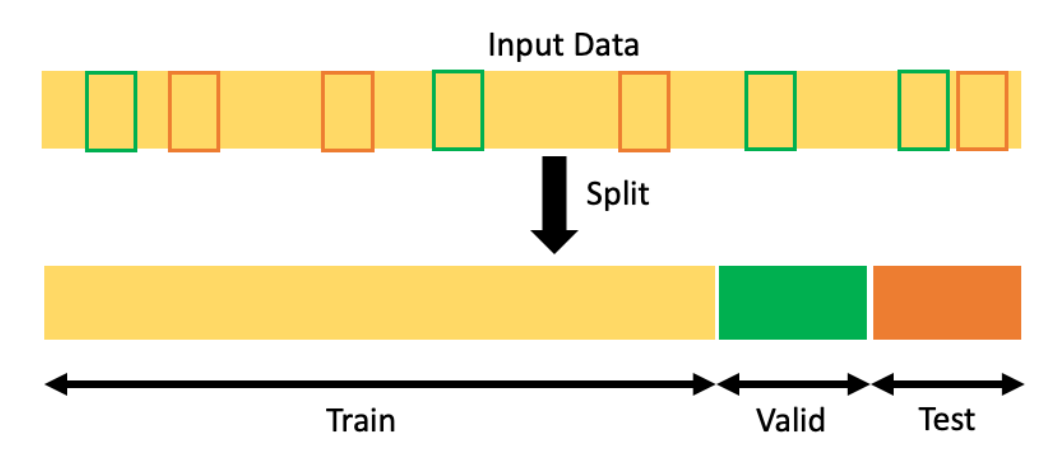

.